In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as tfl
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

## Load the data

In [2]:
IMG_SIZE = 64
BATCH_SIZE = 100

In [3]:
train_gen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2,
    height_shift_range=0.2, zoom_range=0.2, shear_range=0.2, horizontal_flip=True,
    vertical_flip=True)

test_gen = ImageDataGenerator(rescale=1./255)

In [4]:
train_dir = '/home/abdalla/Datasets/Recycling2/TRAIN'
test_dir = '/home/abdalla/Datasets/Recycling2/TEST'

In [5]:
train_data = train_gen.flow_from_directory(train_dir, class_mode='binary',
                                           batch_size=BATCH_SIZE, target_size=(IMG_SIZE, IMG_SIZE))

Found 2513 images belonging to 2 classes.


In [6]:
test_data = test_gen.flow_from_directory(test_dir, class_mode='binary',
                                         batch_size=BATCH_SIZE, target_size=(IMG_SIZE, IMG_SIZE))

Found 1279 images belonging to 2 classes.


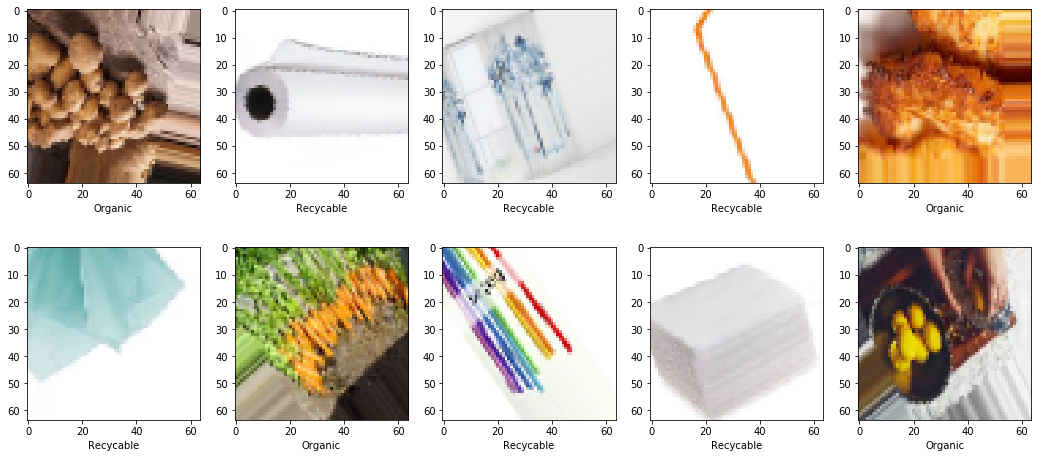

In [7]:
# Look at some pictures from the data
sample = next(train_data)

plt.figure(figsize=(18,8))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(sample[0][i])
    if sample[1][i] == 0:
        plt.xlabel('Organic')
    else:
        plt.xlabel('Recycable')

## Train the Model

In [8]:
model = keras.Sequential([
    tfl.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(IMG_SIZE,IMG_SIZE, 3)),
    tfl.MaxPool2D((2,2), strides=2),
    
    tfl.Conv2D(64, (3,3), padding='same', activation='relu'),
    tfl.MaxPool2D((2,2), strides=2),
    
    tfl.Conv2D(128, (3,3), padding='same', activation='relu'),
    tfl.MaxPool2D((2,2), strides=2),
    
    tfl.Flatten(),
    tfl.Dropout(0.5),
    
    tfl.Dense(128, activation='relu'),
    tfl.Dense(2, activation=keras.activations.softmax)
])

In [9]:
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [10]:
model.fit_generator(train_data, epochs=15, validation_data=test_data)

/home/abdalla/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
26/26 [==============================] - 12s 456ms/step - loss: 0.6965 - accuracy: 0.6606 - val_loss: 0.4766 - val_accuracy: 0.7717
Epoch 2/15
26/26 [==============================] - 10s 391ms/step - loss: 0.4084 - accuracy: 0.8296 - val_loss: 0.4426 - val_accuracy: 0.8155
Epoch 3/15
26/26 [==============================] - 10s 400ms/step - loss: 0.3024 - accuracy: 0.8795 - val_loss: 0.5138 - val_accuracy: 0.8116
Epoch 4/15
26/26 [==============================] - 11s 435ms/step - loss: 0.2521 - accuracy: 0.8922 - val_loss: 0.4789 - val_accuracy: 0.8382
Epoch 5/15
26/26 [==============================] - 11s 438ms/step - loss: 0.2233 - accuracy: 0.9137 - val_loss: 0.6007 - val_accuracy: 0.7991
Epoch 6/15
26/26 [==============================] - 11s 432ms/step - loss: 0.2021 - accuracy: 0.9229 - val_loss: 0.4330 - val_accuracy: 0.8233
Epoch 7/15
26/26 [==============================] - 12s 441ms/step - loss: 0.2104 - accuracy: 0.9193 - val_loss: 0.3911 - val_accuracy: 0.8522

# DONE :D